# Support Vector Regression

1. SVR performs Linear Regression in higher dimension space
2. We think of svr as if each point in the training represents it's own dimension. When you evaluate your kernel between a test point and point in training set the resulting value gives you the coordinate of your test point in that dimension.
3. The vector we get when we evaluate the test point for all the points in the training set, K is the representation of the test point in the higher dimensional space
4. Once you that vector you use it to perform Linear regression


Steps in SVR

1. Collect Training set T={X,Y}
2. Choose a kernel and it's parameters as well as any regularization needed.
3. Find the correlation matrix, K
4. Train your machine,exactly or approximately, to get contraction coefficients alpha
5. Use these coefficients, create your estimator f(X,alpha,X_test)=y_pred



SVR has a different regression goal compared to Linear regression. In linear regression we are trying to minimize the error between prediction and data. In SVR our goal is to make sure that errors donot exceed the threshold.

In [1]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
dataset=pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [4]:
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [5]:
X=dataset.iloc[:,1:2].values

In [6]:
X.shape

(10, 1)

In [7]:
y=dataset.iloc[:,2:].values

In [8]:
y.shape

(10, 1)

In [9]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [10]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [11]:
from sklearn.svm import SVR

In [12]:
regressor=SVR(kernel='rbf')

In [13]:
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
y_pred=regressor.predict(6.5)

In [15]:
print(y_pred)

[ 130001.55760156]


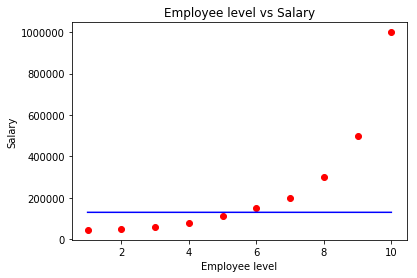

In [16]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title('Employee level vs Salary')
plt.xlabel('Employee level')
plt.ylabel('Salary')
plt.show()

### Ohh no... is this is SVR? No... So what happened?

SVM or SVR tries to maximize the distance between the separating plane and the support vectors. If one feature (i.e. one dimension in this space) has very large values, it will dominate the other features when calculating the distance. If you rescale all features (e.g. to [0, 1]), they all have the same influence on the distance metric. So perform feature scaling first.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc_X=StandardScaler()

In [19]:
sc_Y=StandardScaler()

In [20]:
X_fs=sc_X.fit_transform(X)

In [21]:
y_fs=sc_Y.fit_transform(y)

In [22]:
regressor=SVR(kernel='rbf')

In [23]:
regressor.fit(X_fs,y_fs)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
y_pred=regressor.predict(6.5)

In [25]:
print(y_pred)

[ 0.01158103]


In [26]:
#inverse the scaling
y_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

In [27]:
print(y_pred)

[ 170370.0204065]


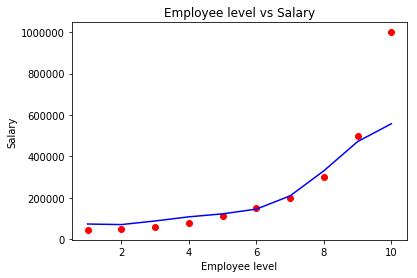

In [30]:
plt.scatter(X,y,color='red')
plt.plot(X,sc_Y.inverse_transform(regressor.predict(X_fs)),color='blue')
plt.title('Employee level vs Salary')
plt.xlabel('Employee level')
plt.ylabel('Salary')
plt.show()

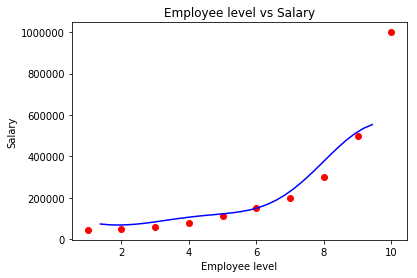

In [34]:
#improve the resolution of the graph
X_grid=np.arange(min(X_fs),max(X_fs),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(sc_X.inverse_transform(X_grid),sc_Y.inverse_transform(regressor.predict(X_grid)),color='blue')
plt.title('Employee level vs Salary')
plt.xlabel('Employee level')
plt.ylabel('Salary')
plt.show()